In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import snow_energy_balance 

Importing TopoFlow packages:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
   topoflow.gui (unfinished)
 
 
Paths for this package:
framework_dir = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/framework/
parent_dir    = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/
examples_dir  = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/examples/
__file__      = topoflow/framework/emeli.pyc
__name__      = topoflow.framework.emeli
 


In [4]:
cfg_file='topoflow/examples/Treynor_Iowa/June_20_67_snow_energy_balance.cfg'
m=snow_energy_balance.snow_component()

In [5]:
m.P_snow=0.02
m.rho_H2O=1000 # density of water kg/m3
m.T_air=10
m.T_surf=8
m.rho_air = 1.225 # density of water kg/m3
m.Cp_air = 1.005 #  specific heat capacity kJ/(kg K))
m.Q_sum = 100 # W/M2
m.initialize(cfg_file);
m.get_current_time()

 
Snow component: Initializing...
Imported netCDF4 version: 1.1.9


/Users/elja0262/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


array(0.0)

In [6]:
time = [m.get_current_time().copy()]
# NOTE: EMELI does not have get_value
vol_SM = [m.get_values('snowpack__domain_time_integral_of_melt_volume_flux').copy()]
h_snow = [m.get_values('snowpack__depth').copy()] 
h_swe = [m.get_values('snowpack__liquid-equivalent_depth').copy()]
SM = [m.get_values('snowpack__melt_volume_flux').copy()]
rho_swe = [m.get_values('snowpack__z_mean_of_mass-per-volume_density').copy()]

print vol_SM, m.get_current_time(), m.get_end_time()
while m.get_current_time() < m.get_end_time():
    m.update()
    time.append(m.get_current_time().copy())
    vol_SM.append(m.get_values('snowpack__domain_time_integral_of_melt_volume_flux').copy() )
    h_snow.append(m.get_values('snowpack__depth').copy() )
    h_swe.append(m.get_values('snowpack__liquid-equivalent_depth').copy() )
    SM.append(m.get_values('snowpack__melt_volume_flux').copy() )
    rho_swe.append(m.get_values('snowpack__z_mean_of_mass-per-volume_density').copy() )
    
print time, vol_SM, h_snow

[array(0.0)] 0.0 36000.0
[array(0.0), array(3600.0), array(7200.0), array(10800.0), array(14400.0), array(18000.0), array(21600.0), array(25200.0), array(28800.0), array(32400.0), array(36000.0)] [array(0.0), array(1237.7964071856288), array(2475.5928143712576), array(3713.3892215568867), array(4951.185628742515), array(6188.982035928144), array(7426.7784431137725), array(8664.574850299401), array(9902.37125748503), array(11140.16766467066), array(12377.96407185629)] [array([[ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       ..., 
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5]]), array([[ 240.49640719,  240.49640719,  240.49640719, ...,  240.49640719,
         240.49640719,  240.49640719],
       [ 240.49640719,  240.49640719,  240.49640719, ...,  240.49640719,
         240.49640719,  240

In [7]:
np.shape(vol_SM), np.shape( h_snow), np.shape( h_swe),np.shape(SM), np.shape(rho_swe)

((11,), (11, 44, 29), (11, 44, 29), (11, 44, 29), (11,))

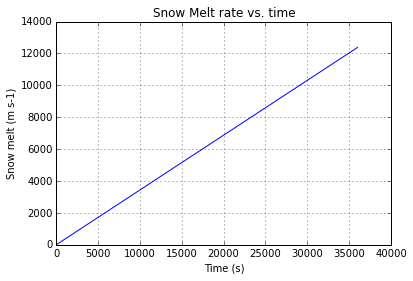

In [8]:
plt.plot(time,vol_SM,'b'); 
plt.xlabel('Time (s)')
plt.ylabel('Snow melt (m s-1)')
plt.title('Snow Melt rate vs. time')
plt.grid(); plt.show()

ValueError: x and y must have same first dimension

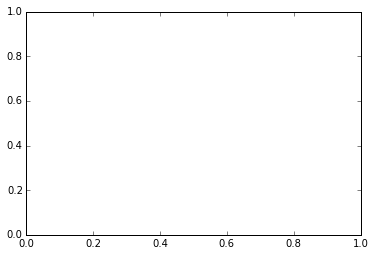

In [26]:

plt.plot(time,h_snow[0]); 
plt.xlabel('Time (s)')
plt.ylabel('Snow depth')
plt.title('Snow Depth rate vs. time')
plt.grid(); plt.show()

In [36]:
h_snow[0].shape

(44, 29)

In [37]:
h_snow[0].size

1276